<a href="https://colab.research.google.com/github/NikitaMarnykh/women_of_Pima_Indian_descent/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D0%B6%D0%B5%D0%BD%D1%89%D0%B8%D0%BD%D1%8B_%D0%BF%D0%B8%D0%BC%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Постановка задачи и описание датасета

Предоставлена выборка пациентов: женщин старше 21 года индейского происхождения Пима.

Информация, содержащаяся в датасете:

* Pregnancies - количество беременностей

* Glucose - концентрация глюкозы в плазме через 2 ч на толерантность к глюкозе

* BloodPressure - диастолическое артериальное давление (мм рт.ст.)

* SkinThickness - толщина кожной складки трицепса (мм)

* Insulin - 2-часовой сывороточный инсулин (мкЕд/мл)

* BMI - индекс массы тела (вес в кг/(рост в м)^2)

* DiabetesPedigreeFunction - функция родословной диабета

* Age – возраст

* Outcome - результат наличия заболевания (диабета): 0 - не выявлен, 1 - выявлен

Исходные данные:

Датасет с женщинами (файл в формате csv по ссылке:
https://docs.google.com/spreadsheets/d/1hPvkRS9NhZM2zTge9ryp_Lq7jG7DxmSnBfSPOsMaWPQ/edi
t?usp=drive_link).

## 2. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install missingno

Подключаем все необходимые зависимости

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno

Подгружаем репозиторий для работы с ним

In [ ]:
!git clone https://github.com/NikitaMarnykh/women_of_Pima_Indian_descent


Cloning into 'women_of_Pima_Indian_descent'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 311.84 KiB | 1.70 MiB/s, done.


Перейдём в установленный репозиторий

In [ ]:
%cd women_of_Pima_Indian_descent/

/content/women_of_Pima_Indian_descent


## 3. Первичный обзор датасета. Оценка размеров датасета, наличия дубликатов и пропусков

Сохраняем датасет в переменную

In [ ]:
dataset = pd.read_csv('diabetes.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True)

Проведём обзор содержимого таблицы

In [ ]:
dataset.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Оценим размеры датасета

In [ ]:
dataset.shape

(768, 9)

Оценим наличие полных дубликатов в датасете

In [ ]:
dataset.duplicated(keep=False).sum()

np.int64(0)

Оценим наличие пропущенных значений в датасете

In [ ]:

dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Визуализируем пропуски

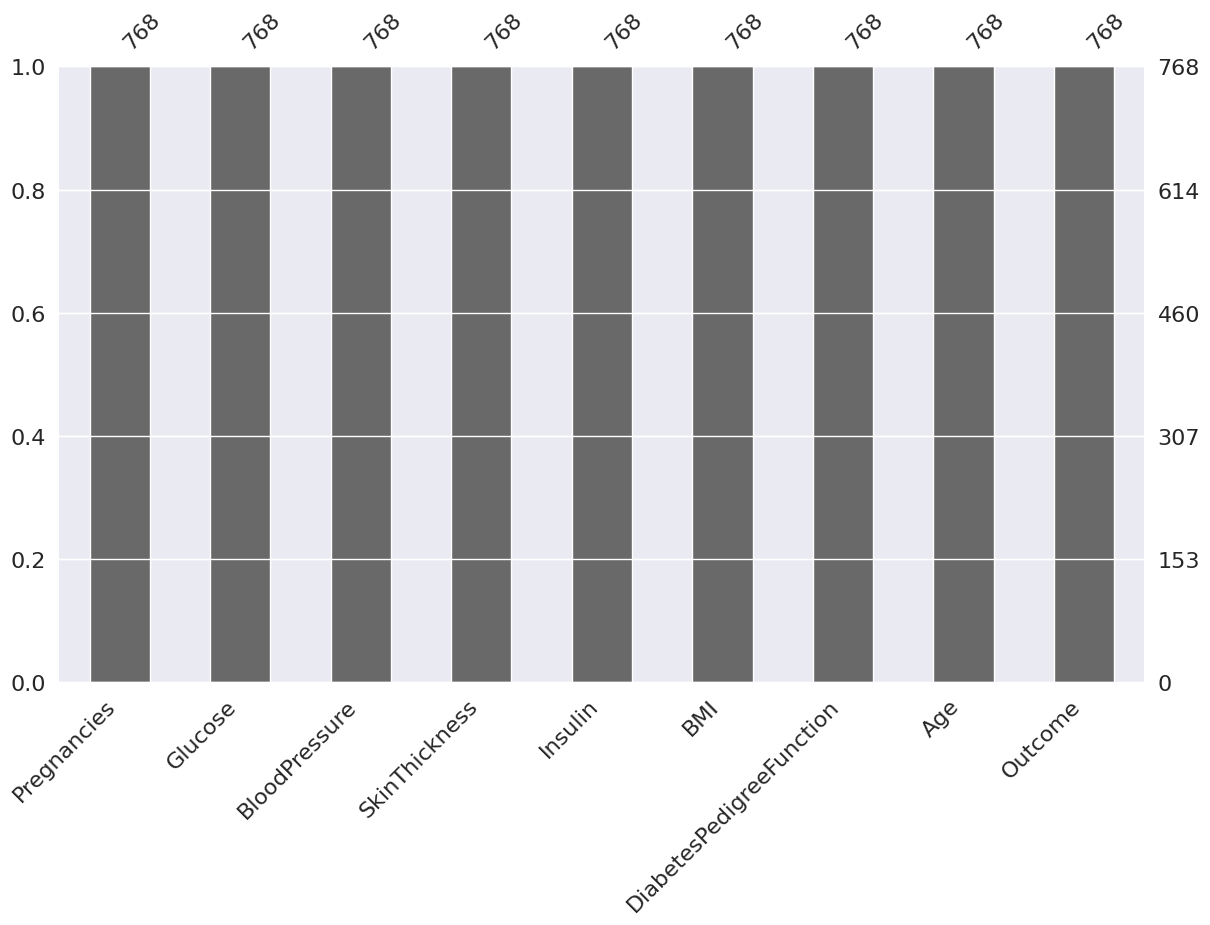

In [ ]:
sns.set()
msno.bar(dataset, figsize=(14, 8))
plt.show()

Просмотрим информацию о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по предварительному осмотру:

  * О размерах датасета:

      - 768 строк (наблюдений), 9 столбцов (признаков)

  * О типах данных:

    - Количественные признаки:

      * Pregnancies

      * Glucose

      * BloodPressure

      * SkinThickness

      * Insulin

      * BMI

      * DiabetesPedigreeFunction

      * Age

    - Категориальные признаки:

      * Outcome

  * О дубликатах:

    - Полные дубликаты отсутствуют

  * О пропущенных значениях:

    - В признаках пропусков нет.

## 4. Предобработка данных

Функция для заполнения нулей соответствующей медианой группы

In [ ]:
def fill_with_group_median(row: pd.Series, group_column: str, sign: str) -> float:
    """
    Заполняет нулевые значения в целевом признаке медианным значением для соответствующей группы.

    :param row: строка DataFrame, содержащая значения признаков пациента
    :param group_column: название колонки для группировки
    :param sign: название целевого признака
    :returns: исходное значение целевого признака, если оно не нулевое, либо медианное значение
              для соответствующей группы, либо общая медиана в качестве резервного значения
    """

    # Проверяем, является ли значение целевого признака нулевым (пропущенным)
    if row[sign] == 0:
        # Пытаемся взять медиану для конкретной группы
        median_for_group = group_median_dict.get(row[group_column])

        if median_for_group is not None:
            # Возвращаем медиану для конкретной группы, если статистика доступна
            return median_for_group
        else:
            # Если для этой группы нет статистик, используем общую медиану
            return overall_median
    else:
        # Возвращаем исходное значение, если оно не нулевое
        return row[sign]

### 4.1 Признак Pregnancies

Запишем имя признака в переменную sign

In [ ]:
sign = 'Pregnancies'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,Pregnancies
0,6
1,1
2,8
3,1
4,0
5,5
6,3
7,10
8,2
9,8


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(17,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(751)

Построим графически на пропущенные значения

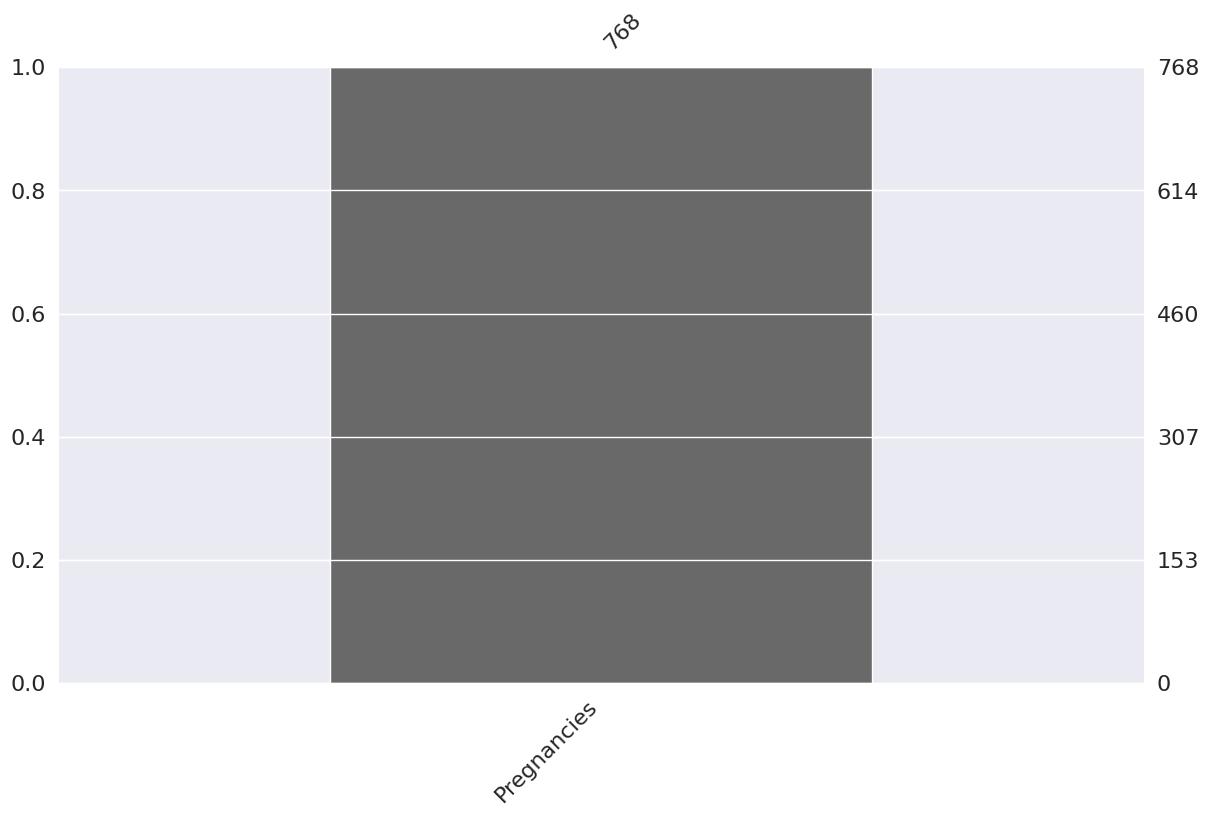

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.2 Признак Age

Запишем имя признака в переменную sign

In [ ]:
sign = 'Age'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,Age
0,50
1,31
2,32
3,21
4,33
5,30
6,26
7,29
8,53
9,54


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(52,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(716)

Построим графически на пропущенные значения

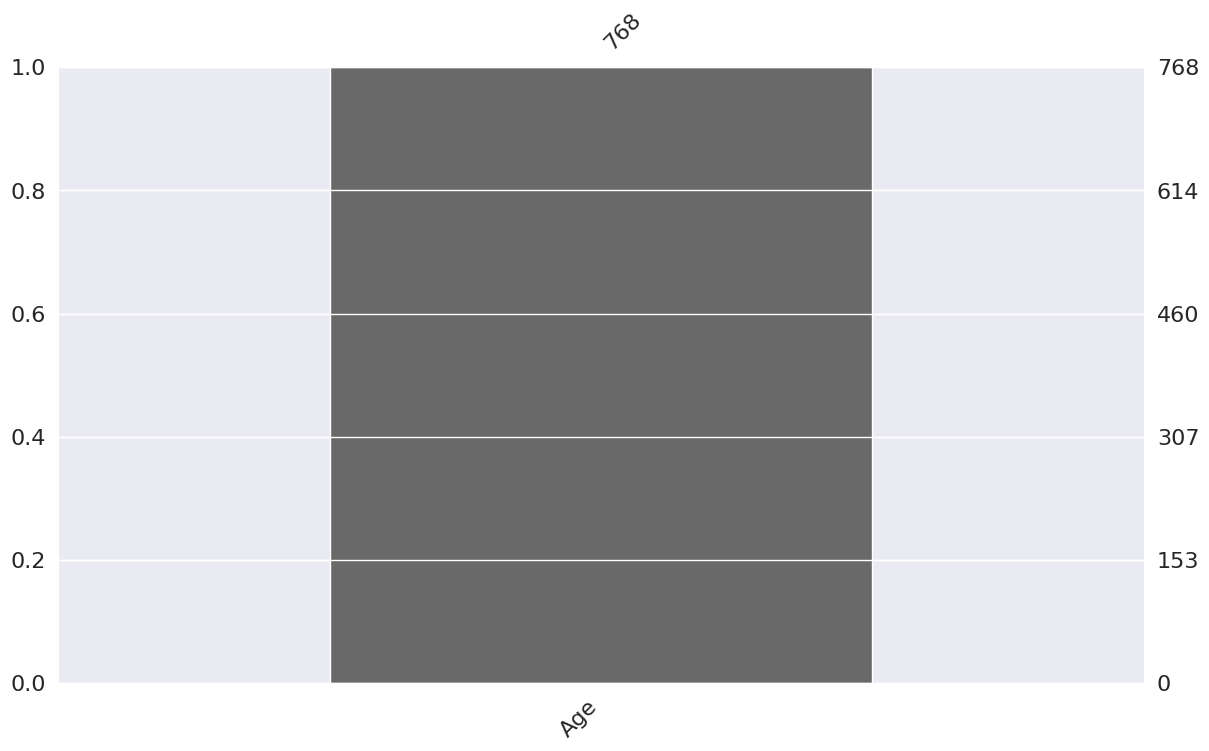

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.3 Признак Glucose

Запишем имя признака в переменную sign

In [ ]:
sign = 'Glucose'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,Glucose
0,148
1,85
2,183
3,89
4,137
5,116
6,78
7,115
8,197
9,125


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(136,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(632)

Построим графически на пропущенные значения

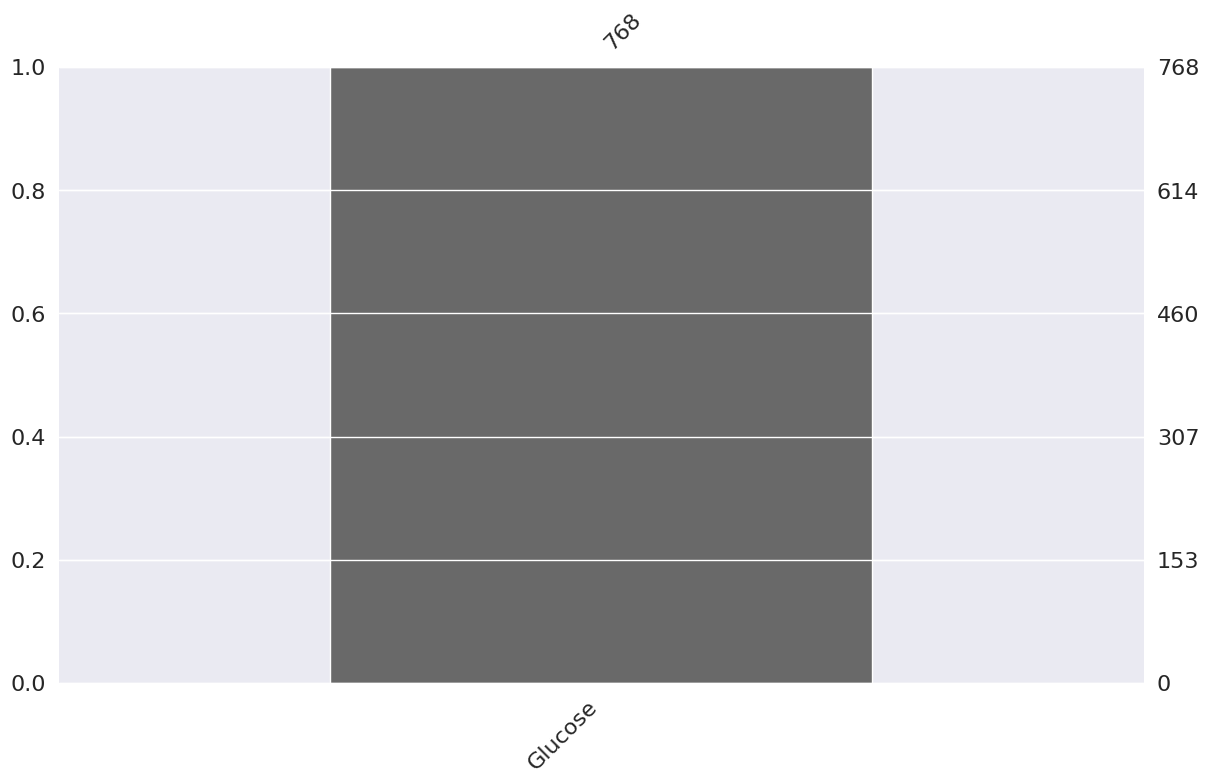

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим на нулевые значения

In [ ]:
dataset[dataset[sign] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Посмотрим на количество нулевых значений

In [ ]:
dataset[dataset[sign] == 0].shape

(5, 9)

Для каждого наблюдения найдём медианное, среднее, минимальное, максимальное значения и количество наблюдений по нему

In [ ]:
statistics = dataset[dataset[sign] != 0][sign].agg(['median', 'mean', 'min', 'max', 'count'])
statistics

,Glucose
median,117.000000
mean,121.686763
min,44.000000
max,199.000000
count,763.000000


Заменим нулевые значения на медианные

In [ ]:
dataset.loc[dataset[sign] == 0, sign] = statistics.loc[('median')]

Убедимся в отсутвии нулевых значений

In [ ]:
dataset[dataset[sign] == 0].shape

(0, 9)

Создадим функцию, которая присваевает категорию по уровню глюкозы

In [ ]:
def categorize_glucose(glucose_level: int | float) -> str:
    """
    Категоризирует уровень глюкозы в плазме по медицинским нормам через 2 часа после ПГТТ.

    :param row: строка DataFrame, содержащая значения признаков пациента
    :param glucose_column: название колонки с уровнем глюкозы
    :returns: категория уровня глюкозы - 'Норма', 'Нарушенная толерантность' или 'Диабет'
    """

    # Проверяем, является ли значение числовым и не NaN
    if pd.isna(glucose_level) or not isinstance(glucose_level, (int, float)):
        # Возвращаем категорию по умолчанию или можно выбросить исключение
        return 'Неопределено'

    # Категоризация по медицинским нормам
    if glucose_level < 140:
        return 'Норма'
    elif 140 <= glucose_level < 200:
        return 'Нарушенная толерантность'
    else:
        return 'Диабет'

На основе данного признака создадим новый категориальный признак

In [ ]:
dataset['Glucose level'] = dataset['Glucose'].apply(categorize_glucose)

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Glucose level             768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


Выводы по обработке признака:

  - Аномалии были найдены

  - После обработки количество признаков увеличилось, а наблюдений не изменилось

  - Нулевые значения были заменены на медианные

### 4.4 Признак Glucose level

Запишем имя признака в переменную sign

In [ ]:
sign = 'Glucose level'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,Glucose level
0,Нарушенная толерантность
1,Норма
2,Нарушенная толерантность
3,Норма
4,Норма
5,Норма
6,Норма
7,Норма
8,Нарушенная толерантность
9,Норма


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array(['Нарушенная толерантность', 'Норма'], dtype=object)

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(2,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(766)

Построим графически на пропущенные значения

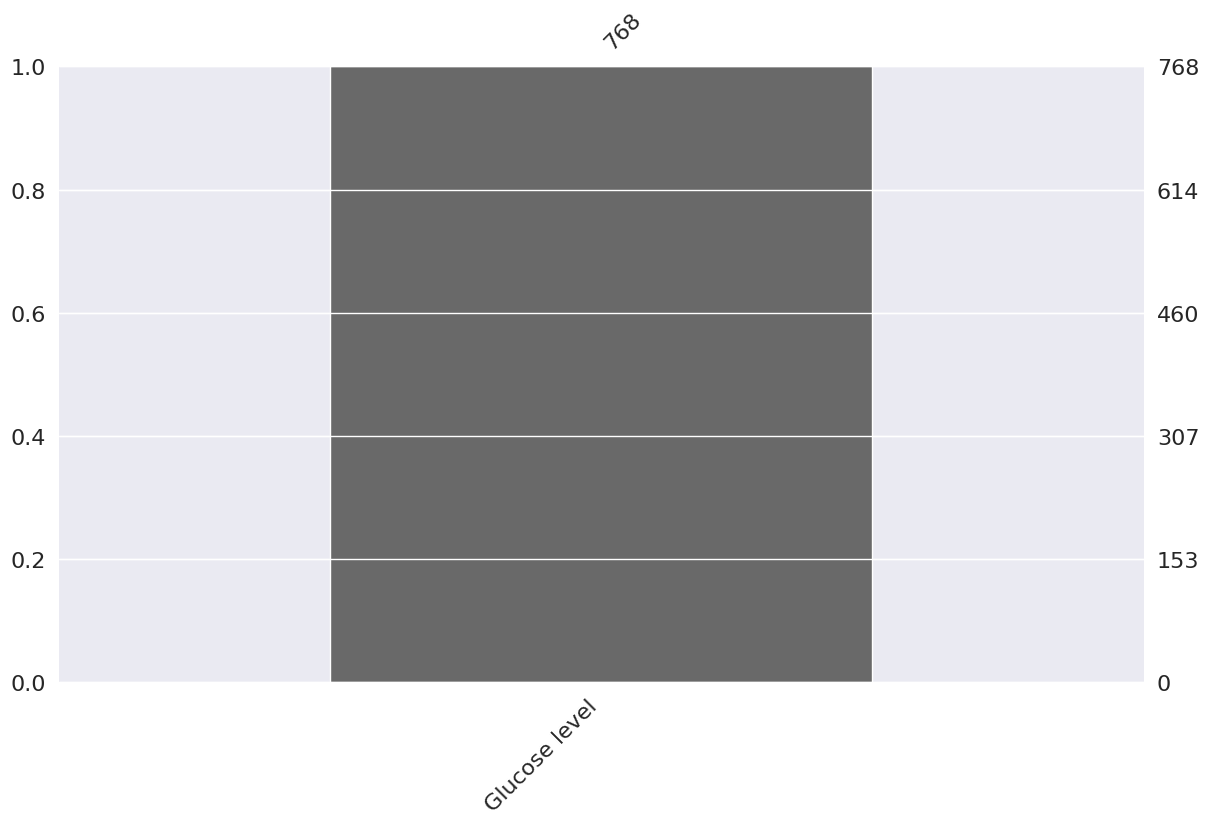

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Приведём признак к категореальному типу

In [ ]:
dataset[sign] = dataset[sign].astype("category")

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   Glucose level             768 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 55.0 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

  - Признак приведён к категориальному типу

### 4.5 Признак Insulin

Запишем имя признака в переменную sign

In [ ]:
sign = 'Insulin'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,Insulin
0,194.0
1,105.0
2,194.0
3,94.0
4,168.0
5,105.0
6,88.0
7,105.0
8,543.0
9,105.0


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array([194., 105.,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96.,
       235., 146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,
        82.,  36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90.,
       270.,  71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,
        18., 135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92.,
       325.,  63., 284., 119., 204., 155., 485.,  53., 114., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 680., 402.,
       258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,  74.,
       182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85., 231.,
        29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249., 293.,
        66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415., 275.,
       165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95., 237.,
       191., 328., 250., 480., 265., 193.,  79.,  8

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(185,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(583)

Построим графически на пропущенные значения

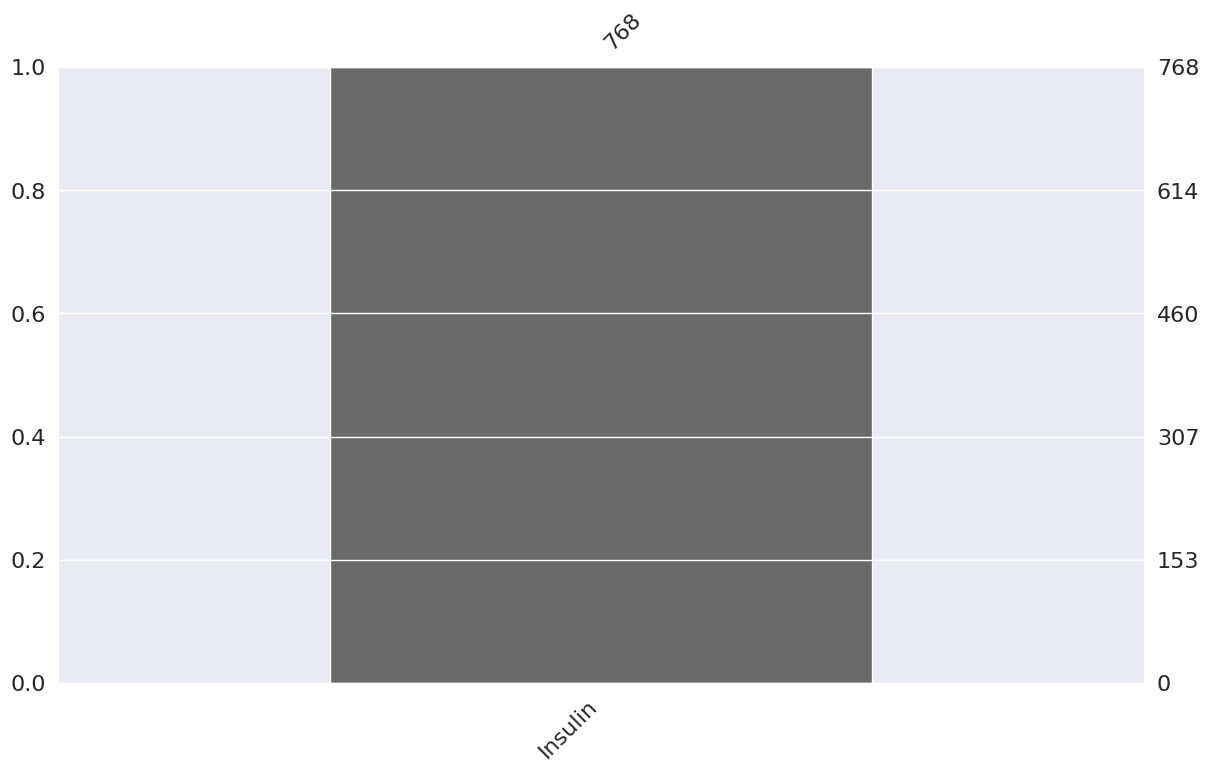

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим на нулевые значения

In [ ]:
dataset[dataset[sign] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose level


Посмотрим на количество нулевых значений

In [ ]:
dataset[dataset[sign] == 0].shape

(0, 10)

Для каждого наблюдения найдём медианное, среднее, минимальное, максимальное значения и количество наблюдений по нему

In [ ]:
group_column = "Glucose level"
statistics = dataset[dataset[sign] != 0].groupby(group_column)[sign].agg(['median', 'mean', 'min', 'max', 'count']).round(2)
statistics

/tmp/ipython-input-268837733.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics = dataset[dataset[sign] != 0].groupby(group_column)[sign].agg(['median', 'mean', 'min', 'max', 'count']).round(2)


,median,mean,min,max,count
Glucose level,,,,,
Нарушенная толерантность,194.0,223.30,14.0,846.0,197
Норма,105.0,112.94,15.0,600.0,571


Создадим словарь и общую медиану на случай отсутствия возраста в статистиках

In [ ]:
group_median_dict = statistics['median'].to_dict()
overall_median = dataset[dataset[sign] != 0][sign].median()

Применяем функцию заполнения к dataset

In [ ]:
dataset[sign] = dataset.apply(
    lambda x: fill_with_group_median(x, group_column, sign),
    axis=1
)

Убедимся в отсутвии нулевых значений

In [ ]:
dataset[dataset[sign] == 0].shape

(0, 10)

Создадим функцию, которая присваевает категорию по уровню признака

In [ ]:
def categorize_insulin(insulin_level: int | float) -> str:
    """
    Категоризирует уровень инсулина в плазме по медицинским нормам через 2 часа после ПГТТ.

    :param insulin_level: уровень инсулина в крови
    :returns: категория уровня инсулина
    """

    # Проверяем, является ли значение числовым и не NaN
    if pd.isna(insulin_level) or not isinstance(insulin_level, (int, float)):
        return 'Неопределено'

    # Категоризация по медицинским нормам через 2 часа после ПГТТ
    if insulin_level < 60:
        return 'Норма'
    elif 60 <= insulin_level < 100:
        return 'Умеренная гиперинсулинемия'
    else:
        return 'Выраженная гиперинсулинемия'

На основе данного признака создадим новый категориальный признак

In [ ]:
dataset['Insulin level'] = dataset[sign].apply(categorize_insulin)

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   Glucose level             768 non-null    category
 10  Insulin level             768 non-null    object  
dtypes: category(1), float64(3), int64(6), object(1)
memory usage: 61.0+ KB


Выводы по обработке признака:

  - Аномалии были найдены

  - После обработки количество признаков увеличилось, а наблюдений не изменилось

  - Нулевые значения были заменены на медианные в разрере признака Glucose level

### 4.6 Признак Insulin level

Запишем имя признака в переменную sign

In [ ]:
sign = 'Insulin level'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,Insulin level
0,Выраженная гиперинсулинемия
1,Выраженная гиперинсулинемия
2,Выраженная гиперинсулинемия
3,Умеренная гиперинсулинемия
4,Выраженная гиперинсулинемия
5,Выраженная гиперинсулинемия
6,Умеренная гиперинсулинемия
7,Выраженная гиперинсулинемия
8,Выраженная гиперинсулинемия
9,Выраженная гиперинсулинемия


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array(['Выраженная гиперинсулинемия', 'Умеренная гиперинсулинемия',
       'Норма'], dtype=object)

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(3,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(765)

Построим графически на пропущенные значения

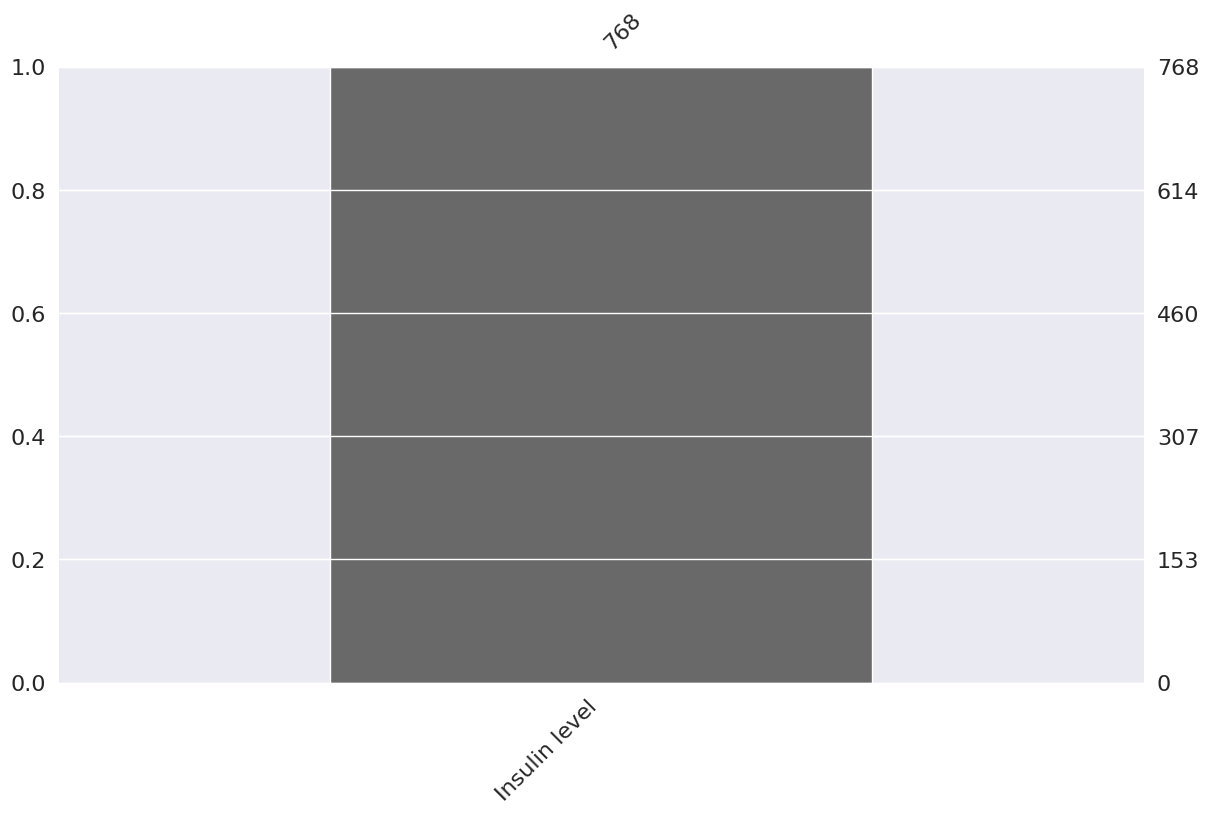

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Приведём признак к категореальному типу

In [ ]:
dataset[sign] = dataset[sign].astype("category")

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   Glucose level             768 non-null    category
 10  Insulin level             768 non-null    category
dtypes: category(2), float64(3), int64(6)
memory usage: 55.9 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

  - Признак приведён к категориальному типу